<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
# !gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [7]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,Pregnancies,1.822917
1,Glucose,0.000000
2,BloodPressure,0.000000
3,SkinThickness,1.041667
4,Insulin,0.000000
5,BMI,1.302083
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

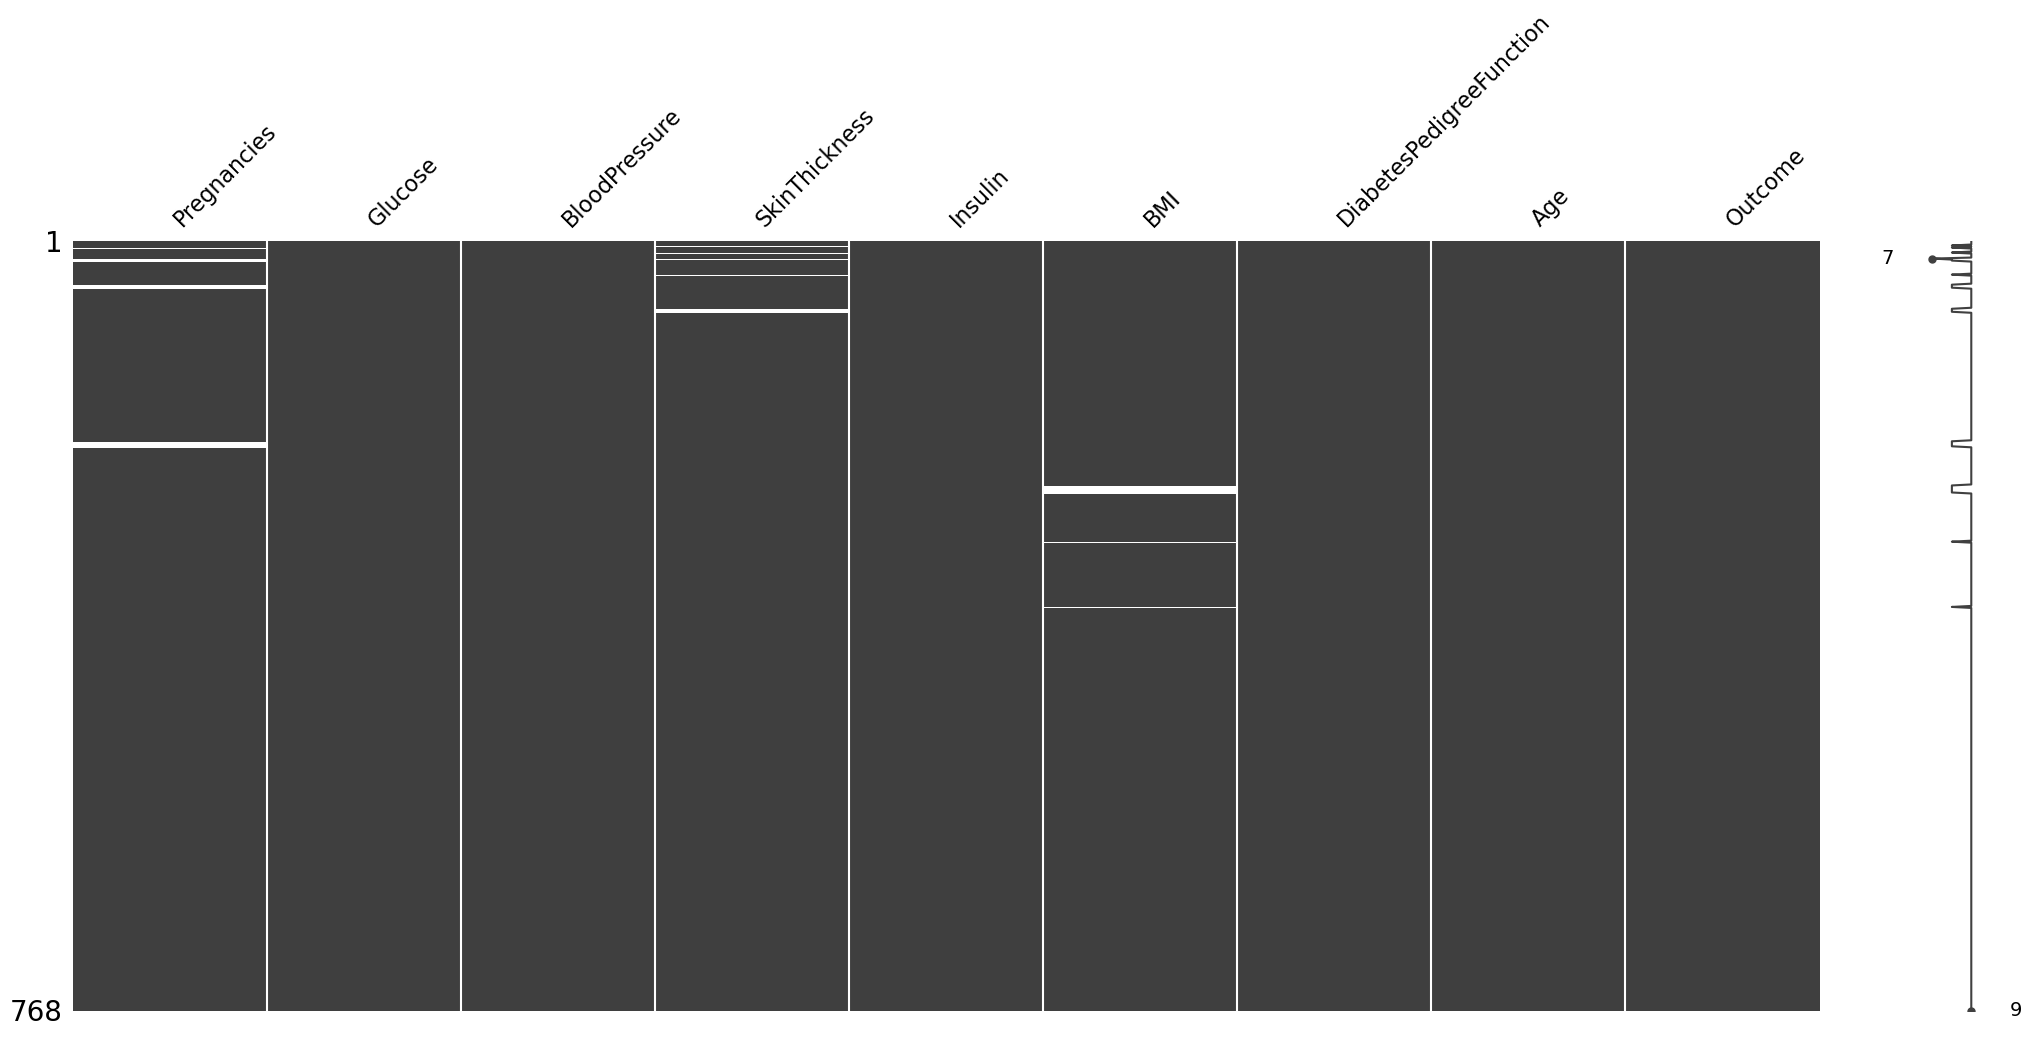

In [8]:
msno.matrix(df)
plt.show()

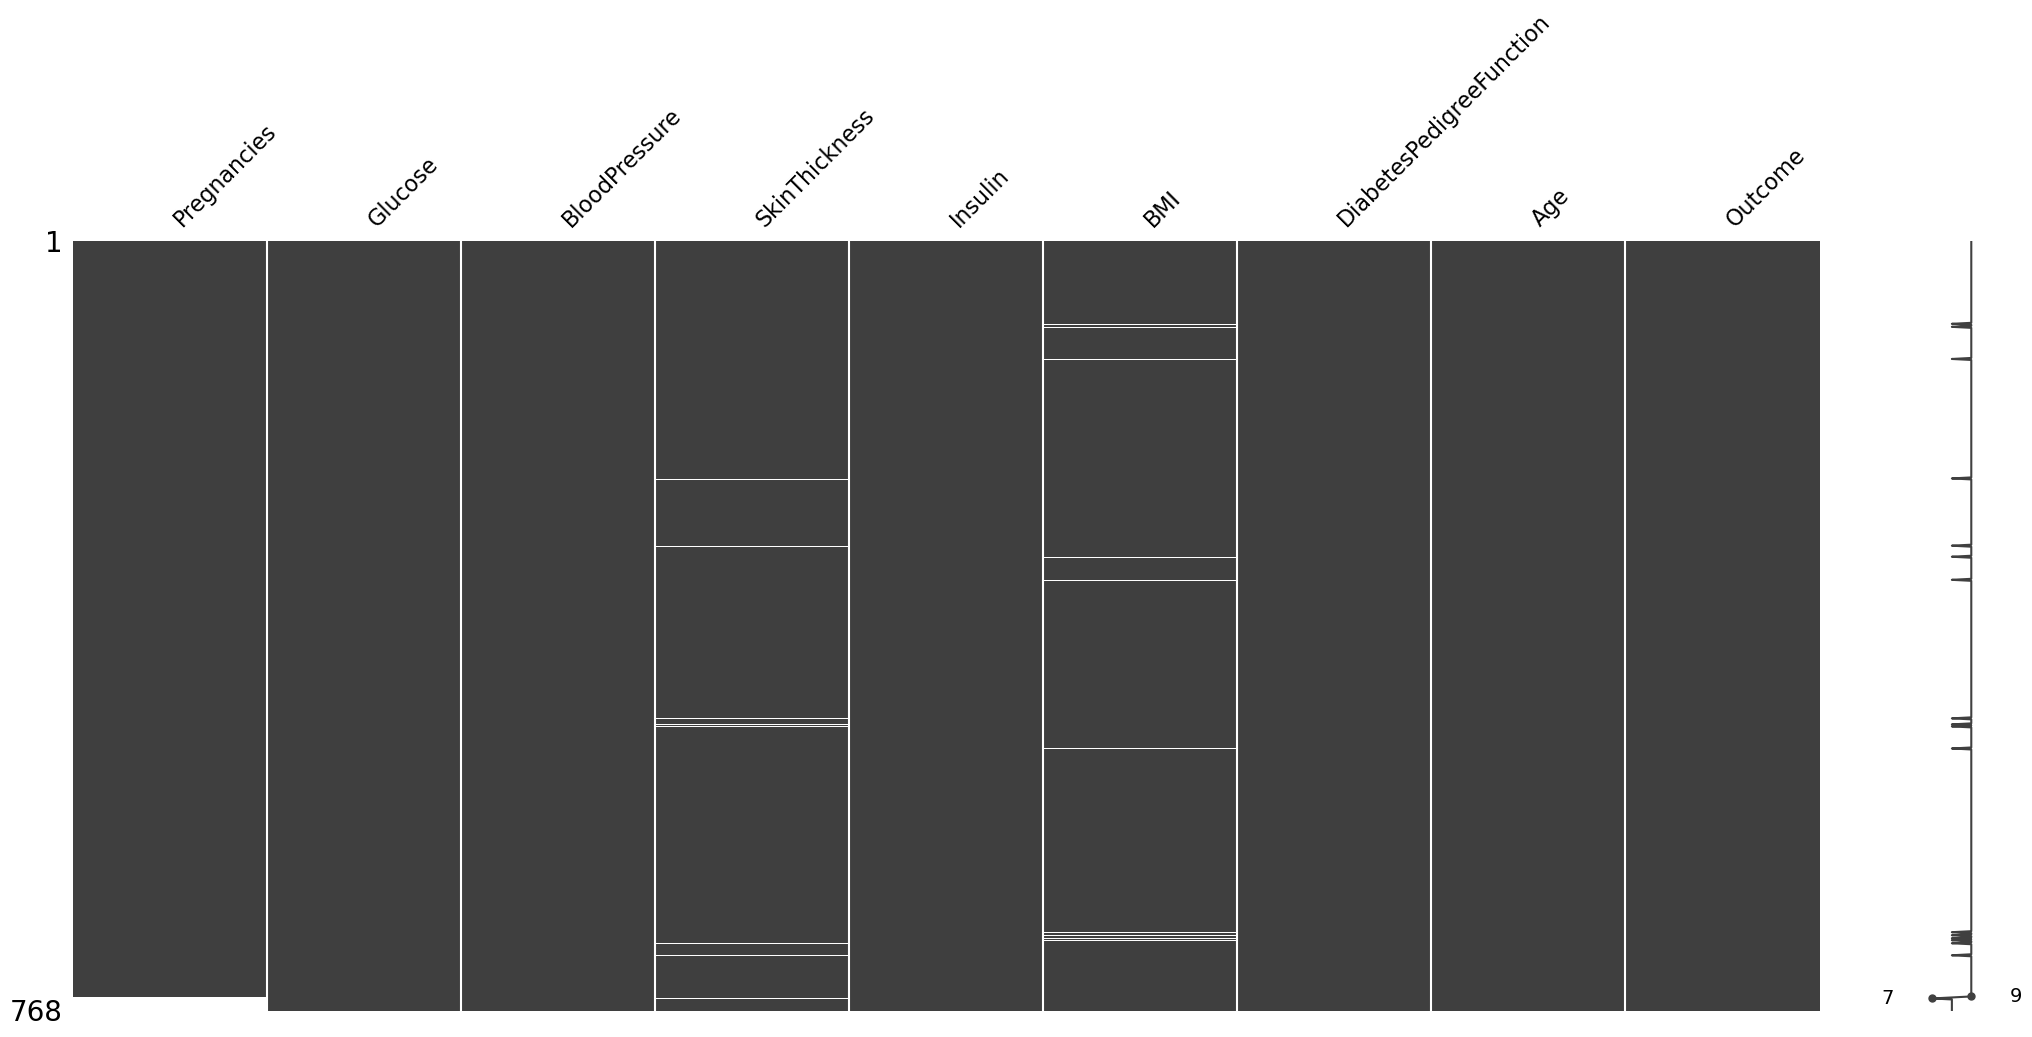

In [9]:
msno.matrix(df.sort_values('Pregnancies'))
plt.show()

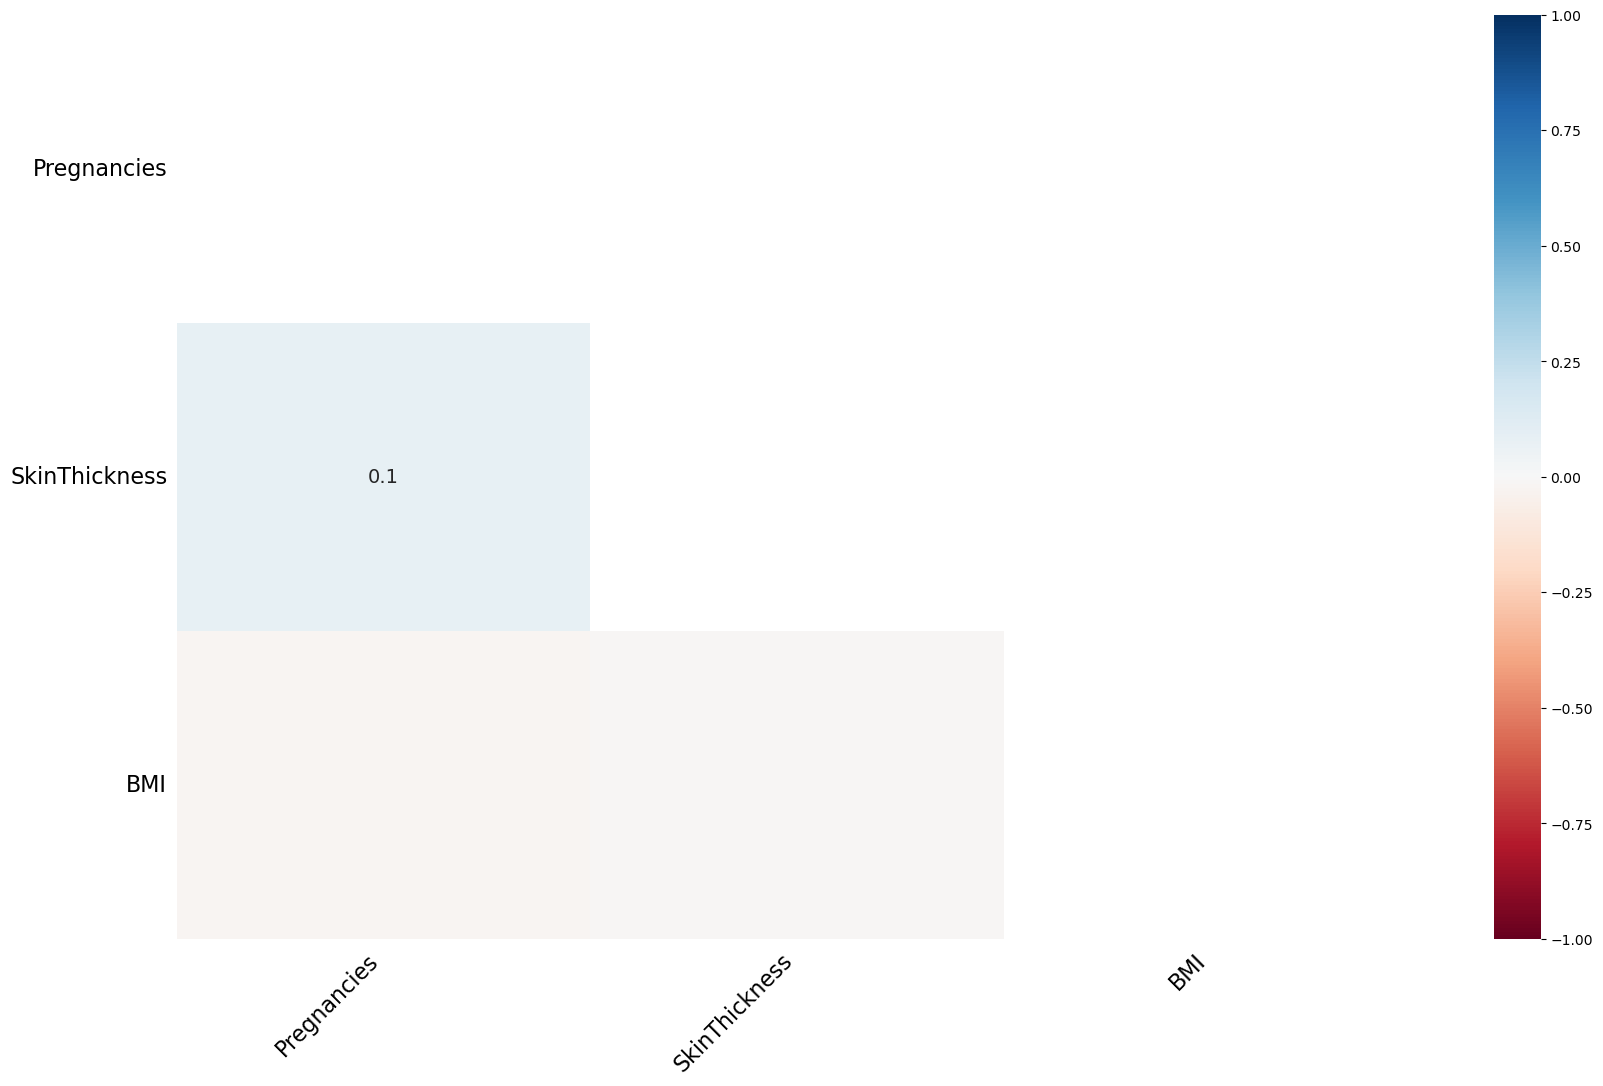

In [10]:
msno.heatmap(df)
plt.show()

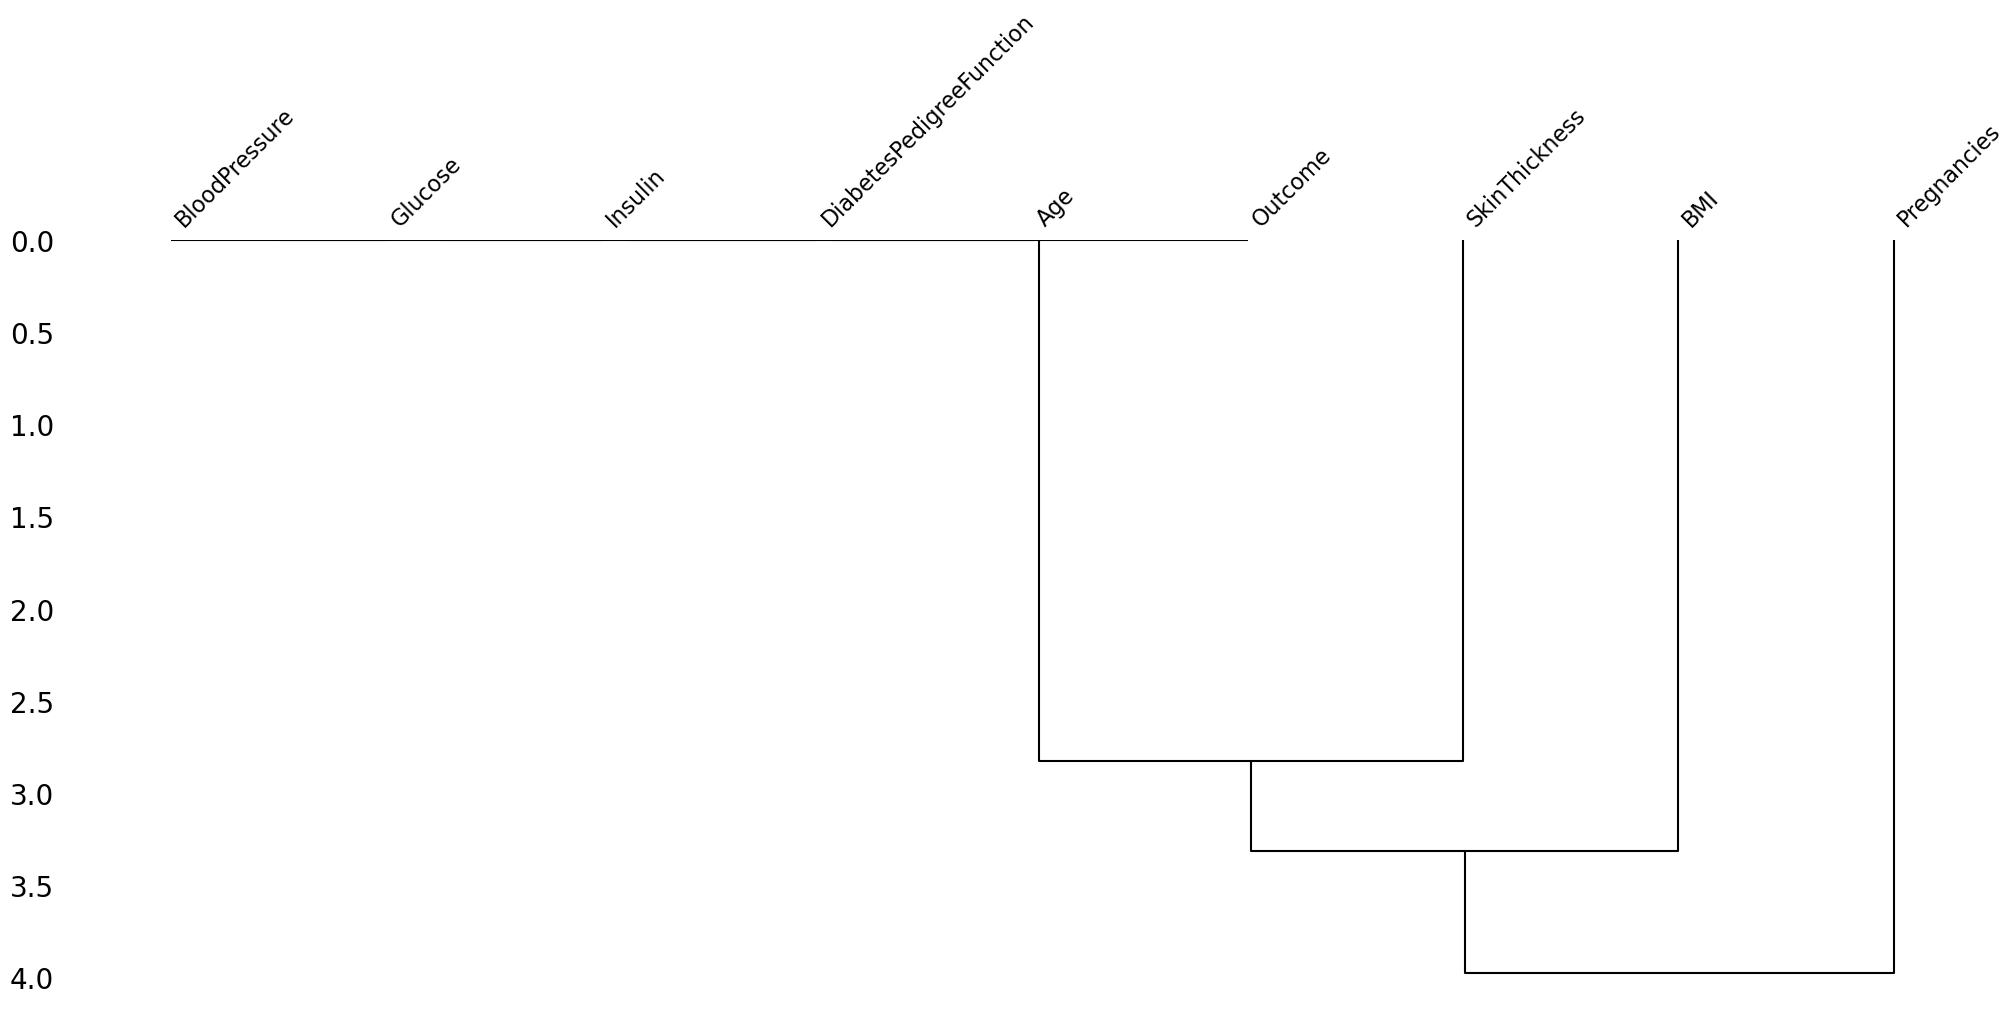

In [11]:
msno.dendrogram(df)
plt.show()

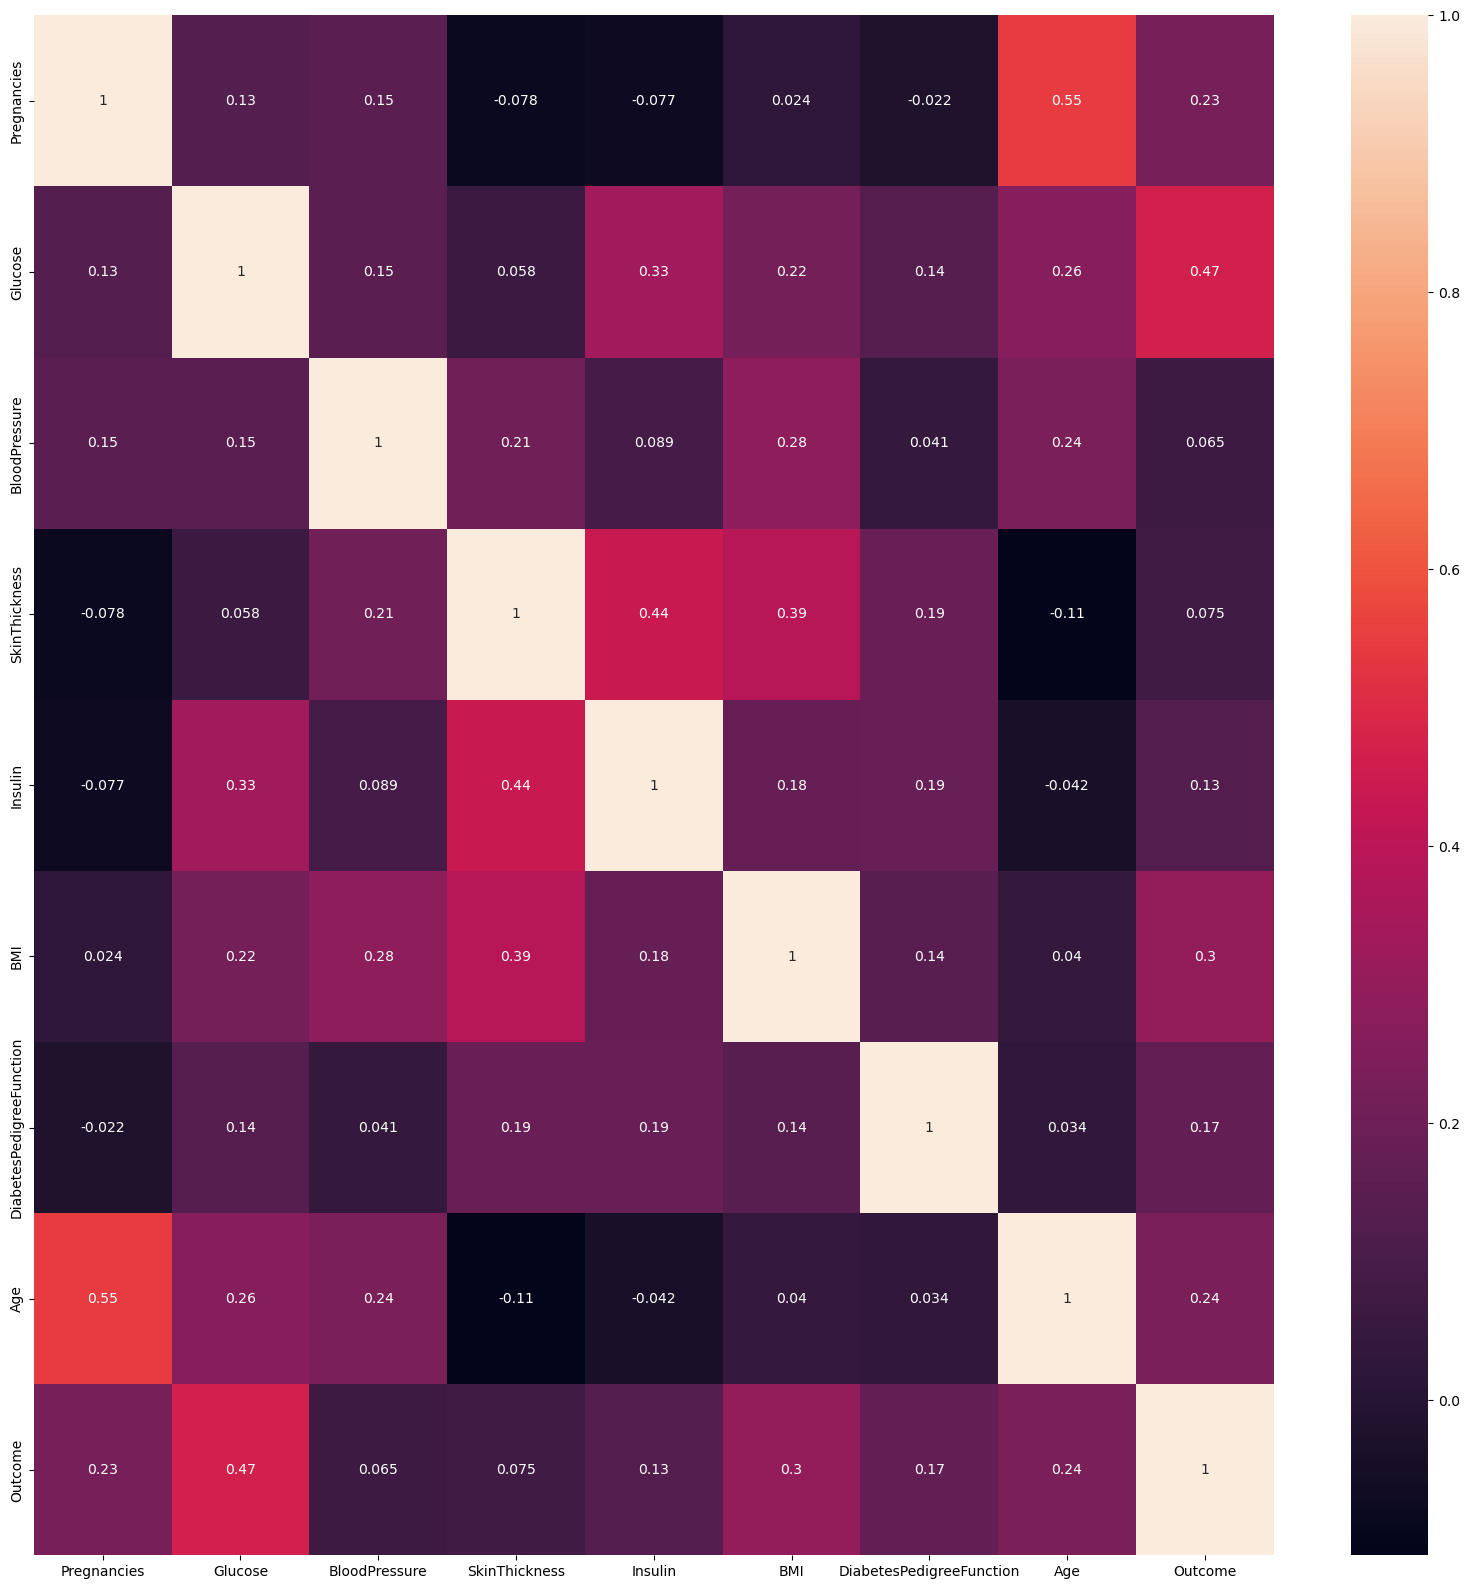

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: ylabel='Frequency'>

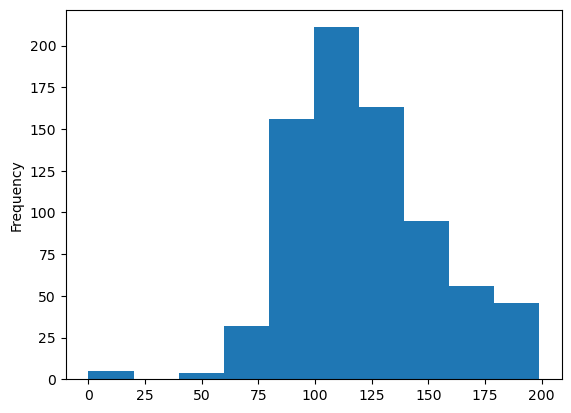

In [13]:
df['Glucose'].plot.hist()

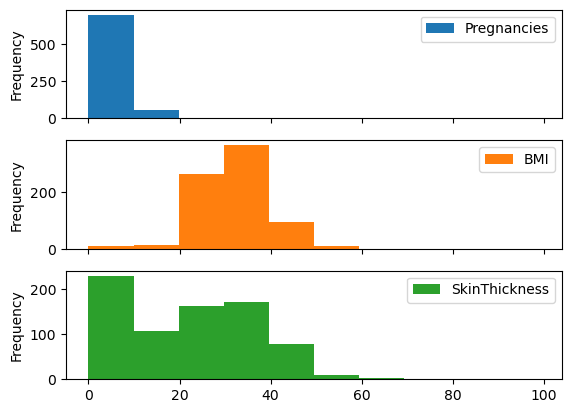

In [14]:
df[['Pregnancies', 'BMI', 'SkinThickness']].plot.hist(subplots=True)
plt.show()

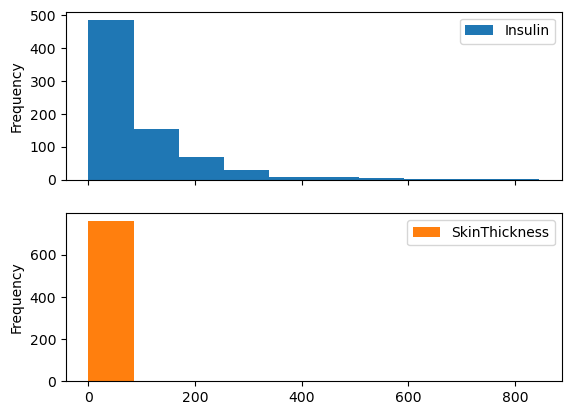

In [15]:
df[['Insulin','SkinThickness']].plot.hist(subplots=True)
plt.show()

## <font color = 'Orange'>Handle the missing values</font>

In [16]:
df.Glucose = df.Glucose.fillna(df.Glucose.mean())

In [17]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Pregnancies', 'BMI']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
df[['Pregnancies', 'BMI']] = imputed_data

In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['SkinThickness', 'Insulin']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
df[['SkinThickness', 'Insulin']] = imputed_data

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [20]:
df.to_csv('diabetes_imputed.csv')

Print the first rows of your final Dataset

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66,23.0,94.0,28.1,0.167,21,0
4,0.0,137,40,35.0,168.0,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df[df.columns[0:-1]],  df['Outcome'], test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [25]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f1_score(Y_test, y_pred, average='macro'))

[[82 16]
 [20 36]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        98
           1       0.69      0.64      0.67        56

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

0.7433333333333333
